<center><h1><b>STATISTICAL INFERENCE</b></h1></center>

**Statistics** is the discipline that concerns the collection, organization, analysis, interpretation, and presentation of data. Statistics deals with every aspect of data, including the planning of data collection in terms of the design of surveys and experiments.

Two main statistical methods are used in data analysis: **descriptive statistics**, which summarize data from a sample using indexes such as the mean or standard deviation, and **inferential statistics** (or 'statistical inference'), which draw conclusions from data that are subject to random variation (e.g., observational errors, sampling variation). Descriptive statistics are most often concerned with two sets of properties of a distribution (sample or population): central tendency seeks to characterize the distribution's central or typical value, while dispersion (or variability) characterizes the extent to which members of the distribution depart from its center and each other. Inferences made using mathematical statistics employ the framework of probability theory, which deals with the analysis of random phenomena. Descriptive statistics is distinguished from inferential statistics (or inductive statistics), in that descriptive statistics aims to summarize a sample, rather than use the data to learn about the population that the sample of data is thought to represent.

We will focus in this notebook in **Statistical inference**, which is the process of drawing conclusions about a population based on a sample of data, so through the observation of a part of th whole population called 'sample'.

Key Goals of Statistical Inference:
* Estimate unknown quantities (e.g. the average height of all trees in a forest).
* Test hypotheses (e.g. is a new drug more effective than the old one?).
* Predict future outcomes (e.g. tomorrow’s temperature).
* Quantify uncertainty in your conclusions.

Two main (and equivalent) approaches for Statistical Inference:
1. **Frequentist** Inference: Assumes parameters are fixed but unknown; Uncertainty comes from data variability; Uses tools like: confidence intervals, hypothesis tests, p-values

2. **Bayesian** Inference: Treats parameters as random variables with prior distributions; Updates beliefs using Bayes’ theorem; Gives direct probabilities about parameters. It is a method of updating your beliefs about something (a hypothesis, parameter, model) in light of new data, using Bayes’ theorem.

Example
Suppose you flip a coin 100 times and get 60 heads. You want to infer the true probability $p$ of getting heads. Frequentist approach: Estimate $p = 0.6$, and compute confidence interval. Bayesian approach: Start with a prior for $p$, update with the data, and get a posterior distribution.


In [1]:
# useful libraries for this notebook
library(png)
library(grid)

---

# 01 - INTRODUCTION TO DISTRIBUTIONS

There are two basic types of distributions: discrete distributions and continuous distributions.
* **Discrete distribution**: finite or countable set of possible outcomes of the random variable. They are represneted by probability mass functions (**PMF**).
* **Continuous distribution**: a random variable can have outcomes in an interval of the real line. They are represented by probability density functions (**PDF**)


#### MEAN AND VARIANCE
The expectation, mean, average or **expected value** reflects the location of a distribution:
$$ E[X] = \sum_i x_i \, p(x_i) \quad \text{for the discrete case} $$
$$ E[X] = \int_{-\infty}^{+\infty} x \, f(x) \, dx  \quad \text{for the continuous case} $$

The **variance** reflects the dispersion of the distribution:
$$ \operatorname{var}(X) = E\left[(X - E[X])^2\right] = E[X^2] - (E[X])^2 $$

#### PROPERTIES
$$ E[a + bX] = a + bE[X] $$
$$ E[X + Y] = E[X] + E[Y] $$
$$ \operatorname{var}(a + bX) = b^2 \operatorname{var}(X) $$
$$ \operatorname{var}(X + Y) = \operatorname{var}(X) + \operatorname{var}(Y) + 2 \, \operatorname{cov}(X, Y) $$
$$ \operatorname{cov}(X, Y) = E\left[(X - E[X])(Y - E[Y])\right] = E[XY] - E[X]E[Y] $$

#### MOMENTS OF A DISTRIBUTION
They are analogous to the center-of-mass and to the moment of inertia.  
Algebraic Moments are the moment of order $k$ about the origin:
$$ \mu'_k = E[X^k] = \sum_j x_j^k \, p_j \quad \text{for the discrete case}  $$
$$ \mu'_k = E[X^k] = \int x^k f(x) \, dx  \quad \text{for the continuous case} $$

Central Moments are the moment of order $k$ about the mean:
$$ \mu_k = E[(X - \mu)^k] = \sum_j (x_j - \mu)^k \, p_j \quad \text{for the discrete case} $$
$$ \mu_k = E[(X - \mu)^k] = \int (x - \mu)^k f(x) \, dx \quad \text{for the continuous case} $$


For a symmetric distribution, all **odd** central moments vanish. Non-zero values of odd moments can indicate **skewness** in a distribution, i.e. a measure of the asymmetry of a probability distribution around its mean. It tells you whether the data is symmetrically distributed, or if it has a longer tail on one side.

#### CDF
The cumulative distribution function (**CDF**) is defined by: $ F(x) = P(X ≤ x) $. In particular:
$$ F(x_j) = P(X ≤ x_j) = \sum_{i≤j} p_i  \quad \text{for the discrete case} $$
$$ F(x) = P(X ≤ x) = \int_{-\infty}^x p(u) \, du \quad \text{for the continuous case} $$

With distribution functions, we compute the probability for intervals $(c, d]$ as:

$$
P(c < X \leq d) = P(X \leq d) - P(X \leq c) = F(d) - F(c) $$

#### PDF IN R
In R all standard distributions are available.  
Naming convention: a **core name** is associated with each distribution, and a **prefix** is added to indicate one of the four basic functions:
- `d` for the **probability density function** (pdf)  
- `p` for the **cumulative distribution function** (cdf)  
- `q` for the **quantile function**  (that is the inverse of the cdf)
- `r` for **random sampling** from the distribution

For example, for the normal distribution, the functions are: `dnorm()`, `pnorm()`, `qnorm()`, `rnorm()`

NOTE:  
The **CDF** gives the probability that a random variable $X$ is less than or equal to a certain value $\alpha$, i.e. it returns $P(X≤\alpha)$  
The **QUANTILE** function does the reverse: it returns the value $\alpha$ such that the probability equals some value $p$, so $P(X≤\alpha)=p$, for a given probability $p \in [0,1] $.

In [5]:
# What is the probability that a value from a standard normal distribution is less than 1.64?
pnorm(1.64)

# What is the value α such that P(X≤α)=0.95 for a standard normal distribution?
qnorm(0.95)

[1] 0.9494974

[1] 1.644854

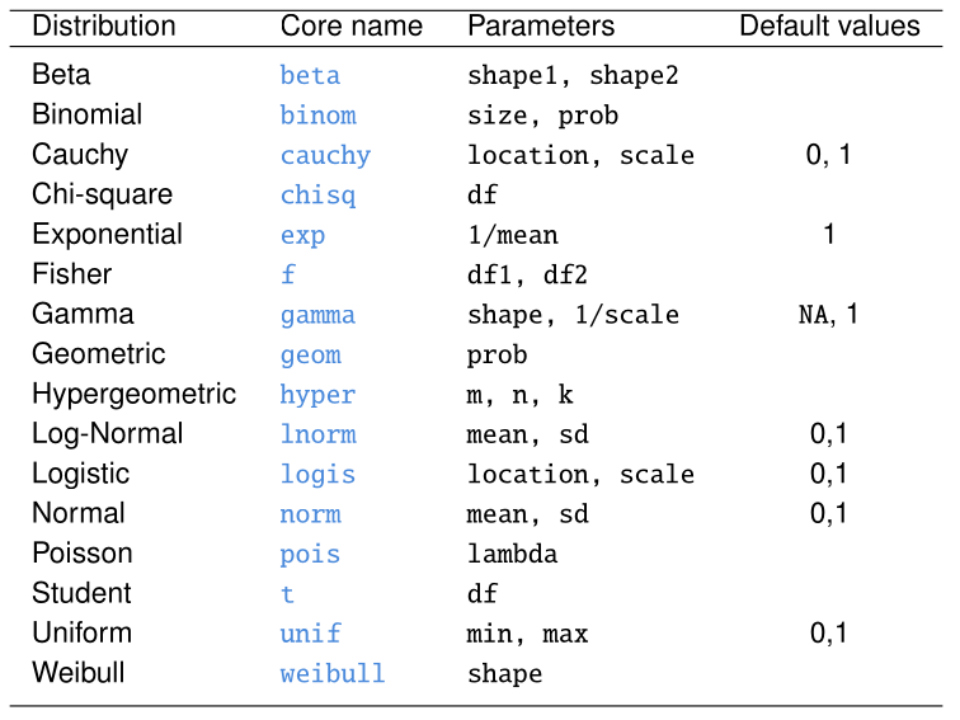

In [8]:
options(repr.plot.width = 8, repr.plot.height = 6)
img <- readPNG("./images/pdf_in_R.png"); grid.raster(img)

---

# 02 - DISCRETE DISTRIBUTIONS

---

## BERNOULLI PROCESS
A Bernoulli process is a random experiment with **only two possible outcomes**: success and failure. If we assign the values $1$ to success and $0$ to failure, then the random variable $ X \in \{0, 1\} $, and:
- Success with probability $ p $: $$ P(X = 1) = p $$
- Failure with probability $ 1 - p $, often denoted as $ q $, where $ q = 1 - p $: $$ P(X = 0) = 1 - p = q $$


The expected value and variance of $X$ are:

$$
E[X] = p
$$

$$
\text{Var}(X) = p(1 - p)
$$

Examples:
* Tossing a coin (e.g., heads = 1, tails = 0)  
* Drawing from a die and checking if the result matches a specific number (e.g., success = rolling a 6)


In [17]:
# example: probability of obatining 6 from a die
p <- 1/6
exp_value <- p; round(exp_value,3)
var <- p*(1-p); round(var, 3)

[1] 0.167

[1] 0.139

---

## BINOMIAL DISTIRBUTION
The **sum of $n$ independent Bernoulli trials** follows a Binomial distribution.  
It give us the probability of obtaining exactly $x$ successes in $n$ independent trials, each with success probability $p$:

$$
B(x| p, n) = \binom{n}{x} p^x (1 - p)^{n - x}
$$

The expected value and variance of a Binomial random variable $X$ are:

$$
E[X] = np
$$

$$
\text{Var}(X) = np(1 - p)
$$

Properties:
* The distribution is symmetric when $p = \frac{1}{2}$
* When $p \ne \frac{1}{2}$, the distribution is skewed
* As $n$ increases, the distribution becomes more symmetric, and for large $n$, it approximates a Gaussian (normal) distribution

Examples:
* Tossing a coin $n$ times and counting the number of heads  
* Throwing multiple dice and counting how many times a certain value appears  
* Drawing $x$ red balls from an urn containing a known proportion of red and white balls (with replacement)

CODE EXAMPLE:  
In a restaurant 8 entrees of fish, 12 of beef and 10 of poultry are served. What is the probability that 2 of the 4 next customers order fish entrees ?

P(2 | np) = 0.229451851851852 


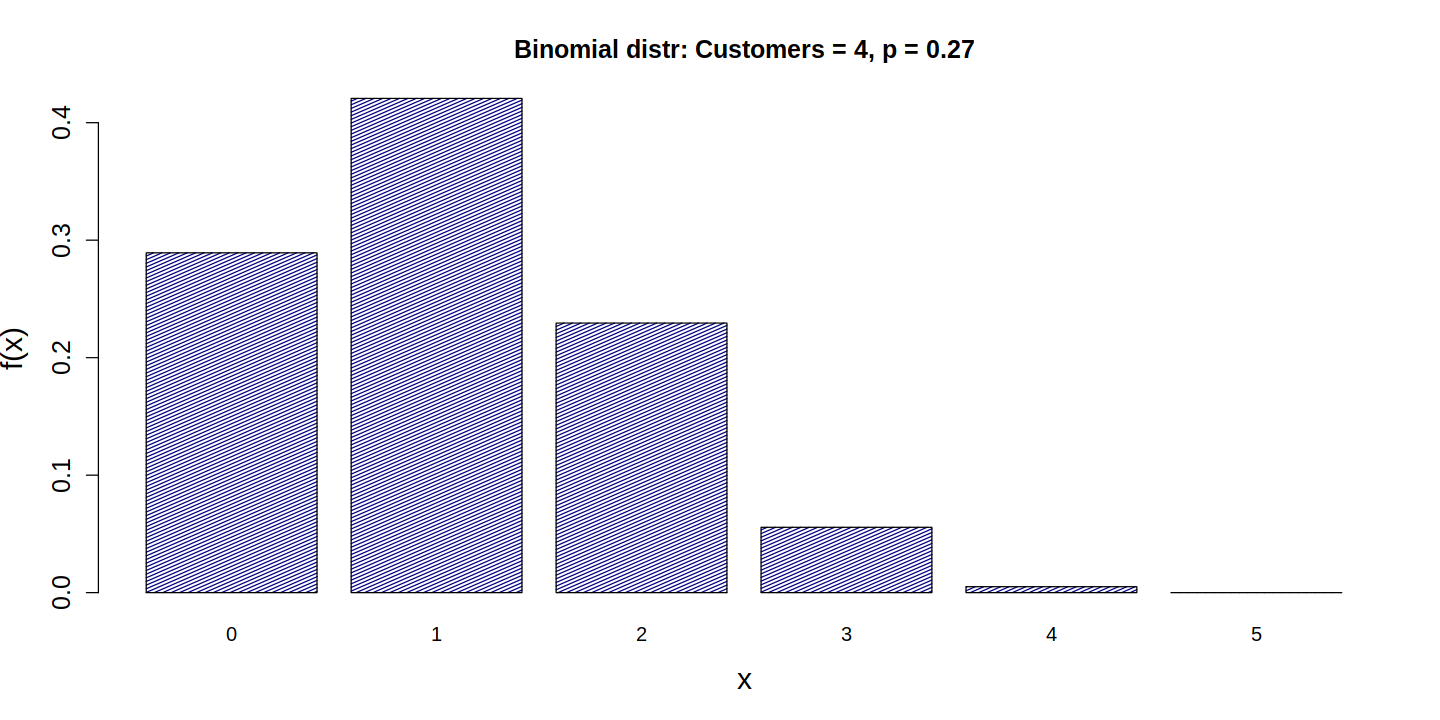

In [35]:
cust <- 4
p <- 8/30
x <- 0:5
ap <- dbinom(x, cust, p)

options(repr.plot.width = 12, repr.plot.height = 6)
barplot( ap,  names.arg = x,   col = "navy",  xlab = "x",  ylab = "f(x)",  density = 40,
  main = sprintf("Binomial distr: Customers = %d, p = %.2f", cust, p),   cex.lab = 1.5,  cex.axis = 1.25, cex.main = 1.25,  cex.sub = 1.5)

cat(paste("P(2 | np) =", ap[3], "\n"))

---

## GEOMETRIC DISTRIBUTION
The geometric distribution gives the number of Bernoulli trials to get the first success. In R we use `dgeom(x,p)`.  
Calling $x$ the number of failures before success (definition used in R), with $x \in {0,1,2..}$, and $p$ the probability of success of a single trial, we have:
$$ Geo(x|p)= p(1-p)^x  $$

Instead if we want to compute $x$ as the number of trials to obtain success, we use $x-1$ in the exponent, with $x \in {1,2,3..}$:
$$ Geo(x|p)= p(1-p)^{x-1}  $$

The expected value and variance are:
$$
E[X] = \frac{1}{p}
$$

$$
\text{Var}(X) = \frac{1-p}{p^2}
$$

Useful results:
$$ P(x ≤ r) = 1 − (1 − p)r = qr $$ 
$$ P(x > r) = 1 − qr $$

In [27]:
# EXAMPLE: COIN TOSS, guessing when I will draw head
p <- 1/2
exp_value <- 1/p; round(exp_value,3)
dev_std <- sqrt( (1-p)/p^2 ); round(dev_std, 3)

[1] 2

[1] 1.41

#### EXAMPLE: The drunk-man and the home keys problem  
A man comes back home pretty drunk, he has 8 keys and tries them randomly to unlock his apartment door. After each trial he loses memory. We watch him and bet on the attempt on which he will succeed $n_{\text{try}} = 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, \dots$. On which number should we bet?

We have $p = \frac{1}{8}$.

Then:

$$ f(1) = P(E_1) = p = \frac{1}{8} $$

$$ f(2) = P(E_2 \cap \bar{E}_1) = P(E_2 | \bar{E}_1) \cdot P(\bar{E}_1) = p \cdot (1 - p) $$

$$ f(3) = P(E_3 \cap \bar{E}_2 \cap \bar{E}_1) = P(E_3 | \bar{E}_2 \cap \bar{E}_1 ) \cdot P(\bar{E}_2 | \bar{E}_1)  \cdot P(\bar{E}_1) =  p \cdot (1 - p)^2 $$

$$ f(x) = p \cdot (1 - p)^{x - 1} $$

Our probabilities follow a geometric distribution with $p = \frac{1}{8}$:

$$ f(1) = \frac{1}{8} = 0.125 $$

$$ f(2) = \frac{1}{8} \cdot \frac{7}{8} = 0.109 $$

$$ f(3) = \frac{1}{8} \cdot \left(\frac{7}{8}\right)^2 = 0.096 $$

$$ f(4) = \frac{1}{8} \cdot \left(\frac{7}{8}\right)^3 = 0.084 $$

So the first trial is the most probable.   

Expected number of trials and standard deviation:

$$ E[X] = \frac{1}{p} = 8 $$

$$ \sigma = \sqrt{\frac{1 - p}{p^2}} = \sqrt{\frac{7/8}{(1/8)^2}} = 7.5 $$


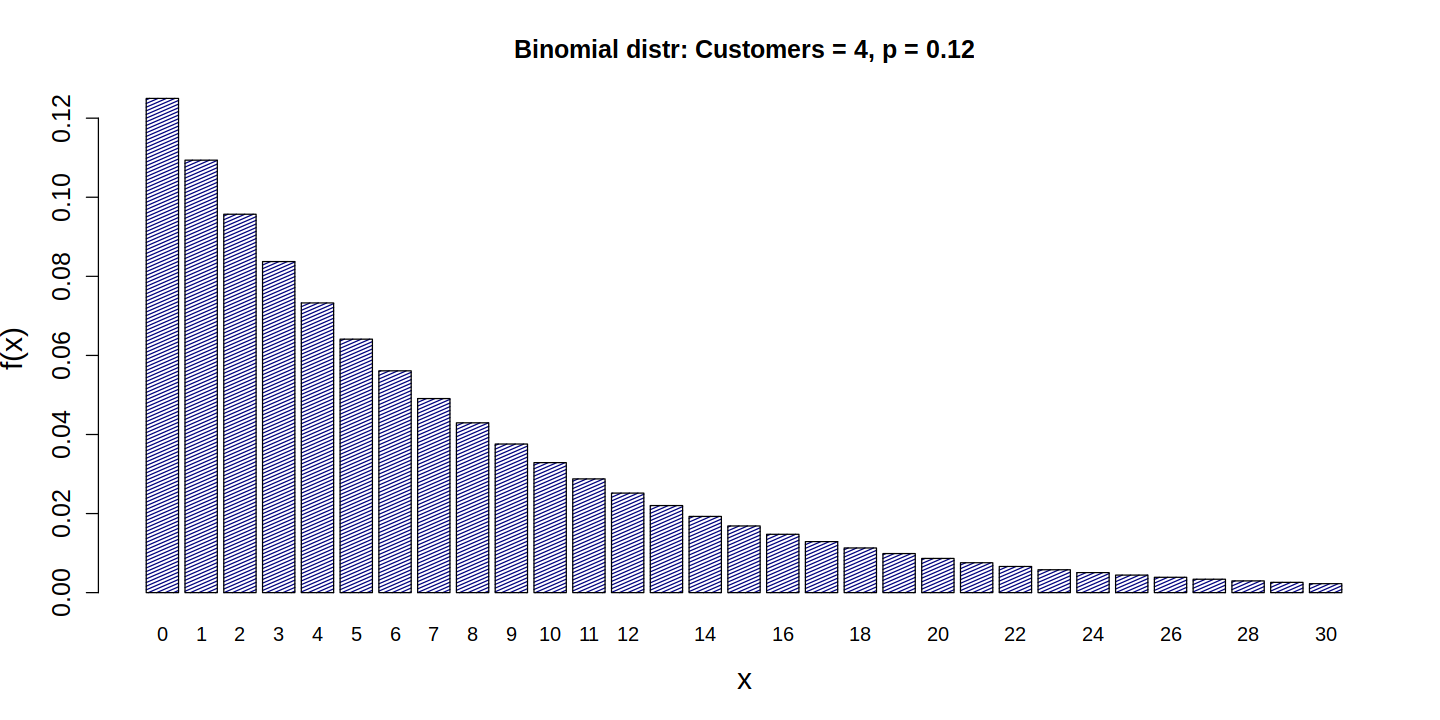

In [36]:
cust <- 4
p <- 1/8
x <- 0:30
ap <- dgeom(x, p)

options(repr.plot.width = 12, repr.plot.height = 6)
barplot( ap,  names.arg = x,   col = "navy",  xlab = "x",  ylab = "f(x)",  density = 40,
  main = sprintf("Binomial distr: Customers = %d, p = %.2f", cust, p),   cex.lab = 1.5,  cex.axis = 1.25, cex.main = 1.25,  cex.sub = 1.5)

---

## MULTINOMIAL DISTRIBUTION

The multinomial distribution is a generalization of the binomial distribution to the case of more than two possible outcomes.  
Let the disjoint outcomes be labeled as $A_1, A_2, \dots, A_r$ with probabilities $P(A_j) = p_j$, where $1 \leq j \leq r$.  
In $n$ independent trials, let $x_j$ denote the number of times outcome $A_j$ occurs, such that $ n = x_1 + x_2 + \dots + x_r $.

The probability mass function is:

$$
P(X_1 = x_1, X_2 = x_2, \dots, X_r = x_r \mid p_1, p_2, \dots, p_r, n) =
\frac{n!}{x_1! x_2! \dots x_r!} p_1^{x_1} p_2^{x_2} \dots p_r^{x_r}
$$

Properties:
$$
\mathbb{E}[x_j] = n p_j
$$

$$
\mathrm{Var}(x_j) = n p_j (1 - p_j)
$$

$$
\mathrm{Cov}(x_i, x_j) = -n p_i p_j
$$

As $n$ becomes large, the multinomial distribution tends toward a multivariate normal distribution.

Note: the marginalization to a single outcome coincides with the binomial distribtuion!

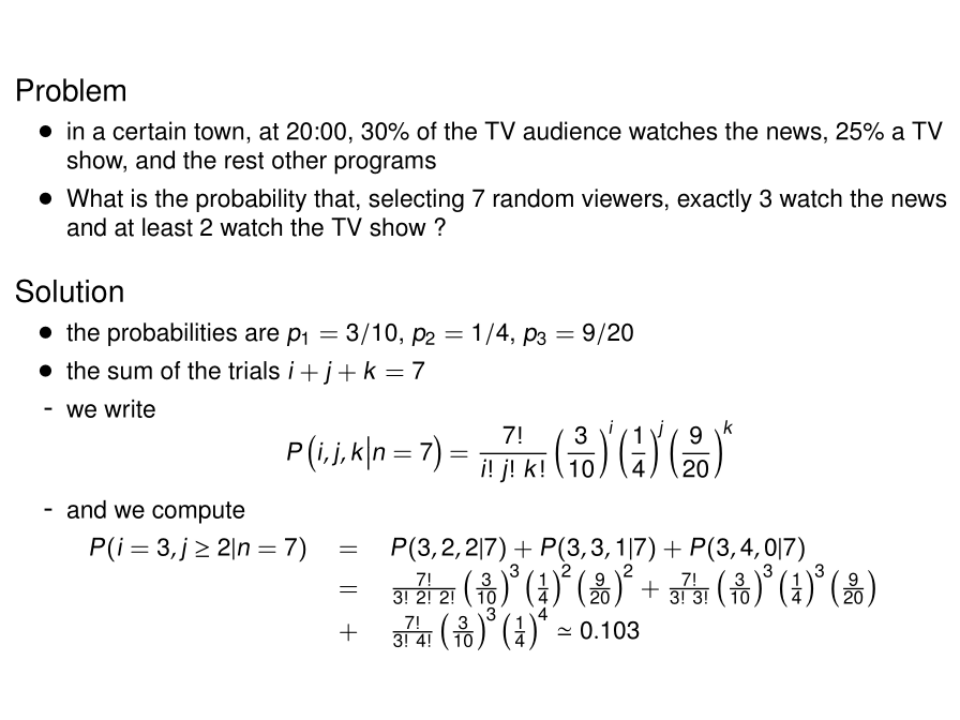

In [40]:
# EXAMPLE:
options(repr.plot.width = 8, repr.plot.height = 6)
img <- readPNG("./images/multinomial_example.png"); grid.raster(img)

---

## POISSON DISTRIBUTION

#### PROCESS INTRODUCTION
The **Poisson Process** is a type of event that might happen over time, with the following assumptions:

- The probability of one count in a small time interval $\Delta t$ is proportional to $\Delta t$: $   P(\text{1 count in } \Delta t) = r \, \Delta t $ where $r$ is the intensity (rate) of the process.
- The probability of two or more events in $\Delta t$ is negligible: $ P(\geq 2 \text{ counts in } \Delta t) \ll P(1 \text{ count}) $. This tells us that the occurrence of two or more events in a small time is practically
impossible.
- Events are independent across disjoint intervals: the probability of n events in [t, t + s] is independent of
how many events have accurred earlier, the process is memoryless.
- Stationarity: given two equal time intervals, ∆t1 and ∆t2 , the probability of n
events in ∆t1 is equal to that in ∆t2


Examples: Accidents occurring at an intersection; Gamma rays emitted from a radioactive source; Customers entering a post office; Earthquakes in Italy.


#### DISTRIBUTION

The **Poisson distribution** (probability mass function in this case) is:

$$ Pois(X=k|\lambda) = \frac{\lambda^k}{k!} e^{-\lambda} $$

where: $\lambda = rT$ is the **expected number of events** in the interval; $k$ is a non-negative integer representing the specific **number of events for which we want to calculate the probability** of occurrence within that interval. We can use this distrib with `dpois(x, lambda)`.

Properties:

$$
\mathbb{E}[X] = \lambda
$$

$$
\mathrm{Var}(X) = \lambda
$$

$$
Pois(X = k) = \frac{\lambda}{k} Pois(X = k - 1)  \quad \quad \text{Recursive identity}
$$

$$
X = X_1 + X_2 + \dots + X_k \sim \text{Poi}(\lambda_1 + \lambda_2 + \dots + \lambda_k) \quad \quad \text{sum of Pois is Pois}
$$

The last equation tells us that the sum of independent Poisson variables is also a Poisson variable with mean value equal to the sum of individual means.  
Asymptotically, for large $\lambda$, the Poisson distribution approximates the normal distribution. The approximation is fairly accurate already at $\lambda \approx 20$.



#### DERIVATION FROM BINOMIAL DISTRIB.

We can derive the Poisson distribution as a limiting case of the Binomial distribution. Taking the limit as $n \to \infty$, $p \to 0$, with $np = \lambda$ held constant, we obtain the Poisson distribution:

  $$
  \lim_{n \to \infty} \text{Bin}(n, p) = \text{Poi}(\lambda)
  $$

---




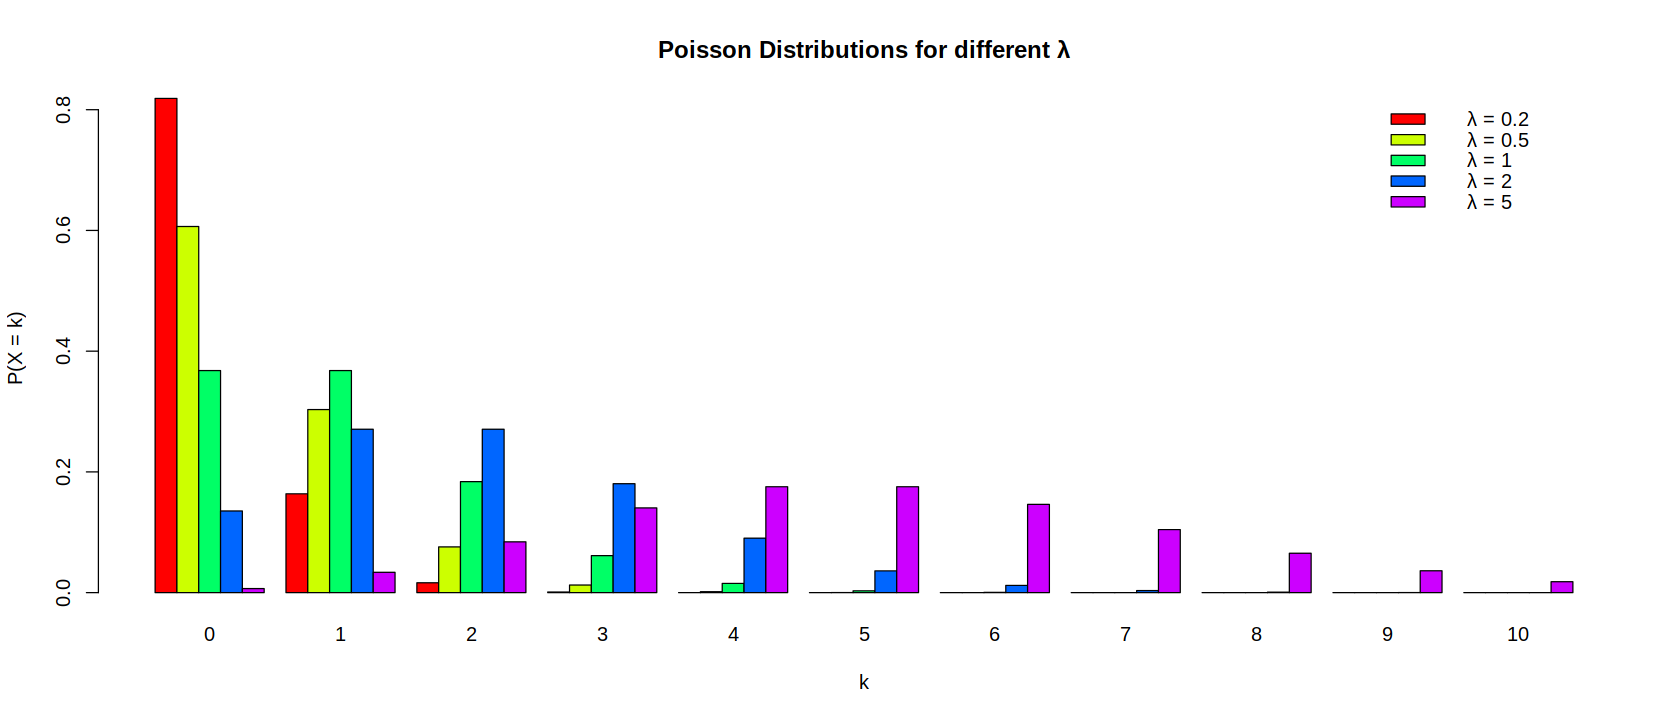

In [18]:
# Lambda values
lam <- c(0.2, 0.5, 1, 2, 5)
x_val <- 0:10

# Compute Poisson probabilities for each lambda
y_mat <- sapply(lam, function(l) dpois(x_val, l))

# Transpose to get each row as a bar group
options(repr.plot.width = 14, repr.plot.height = 6)
barplot(t(y_mat),
        beside = TRUE,
        col = rainbow(length(lam)),
        names.arg = x_val,
        xlab = "k",
        ylab = "P(X = k)",
        main = "Poisson Distributions for different λ",
        legend.text = paste("λ =", lam),
        args.legend = list(x = "topright", bty = "n"))


EXAMPLE:    
A radioactive substance emits on average 3.9 $\alpha$/s per gram. Compute the probability that, in the next second, the number of emitted alpha particles is:
1. at most 6
2. at least 2
3. at least 3 and at most 6

SOLUTION:  
Every gram of element has $n$ atoms. From the information we have, the expected number of events is: $ \mathbb{E}[X] = np = \lambda = 3.9 $
1. Probability that $x \leq 6$:
  $$
  P(x \leq 6) = \sum_{x=0}^{6} \frac{3.9^x}{x!} e^{-3.9}
  $$
2. Probability that $x \geq 2$:
  $$
  P(x \geq 2) = 1 - P(x \leq 1) = 1 - \sum_{x=0}^{1} \frac{3.9^x}{x!} e^{-3.9}
  $$
3. Probability that $3 \leq x \leq 6$:
  $$
  P(3 \leq x \leq 6) = \sum_{x=3}^{6} \frac{3.9^x}{x!} e^{-3.9}
  $$



In [32]:
lam <- 3.9
cat( 'answer 1:', ppois(6,lam) , '\n' )
cat( 'answer 2:', 1-ppois(1,lam) , '\n' )
cat( 'answer 3:', ppois(6,lam) - ppois(2,lam) , '\n' )

answer 1: 0.899483 
answer 2: 0.9008146 
answer 3: 0.6463579 


---

## EXPONENTIAL DISTRIBUTION
The **inter-arrival time of any two consecutive events of a Poisson Process** follows an exponential distribution. Examples are: Time between two customers in a shop; Duration of a phone call; Time between two accidents at an intersection; Time until the next baby is born in a hospital; Time to failure of a chip in a group of fault-free devices.  
The distribution is given by:

$$
Exp(t) =
\begin{cases}
\lambda e^{-\lambda t} & t \geq 0 \\
0 & t < 0
\end{cases}
$$
where $\lambda$ is the poisson rate and $t$ the time.  

The CDF is given by:
$$
F(t) =
\begin{cases}
1 - e^{-\lambda t} & t \geq 0 \\
0 & t < 0
\end{cases}
$$

Properties:
$$
\mathbb{E}[X] = \frac{1}{\lambda}, \quad \text{Var}(X) = \frac{1}{\lambda^2}
$$


EXAMPLE:  
Suppose that every three months, an earthquake of some entity happens in Italy. What is the probability that the next earthquake happens after three but before seven months?

Calling $X$ the time in month until the next earthquake, it will follow an exponential distribution with $\lambda=1/3$ (prob of having an earthquake in a single month, i.e. our time interval):
$$ P(3 < X < 7) = F(7) − F(3) = (1 − e^{7/3}) − (1 − e^{3/3}) $$

In [31]:
lambda <- 1/3
cat( 'answer:', pexp(7,lambda ) - pexp(3,lambda ) , '\n' )

answer: 0.2709075 


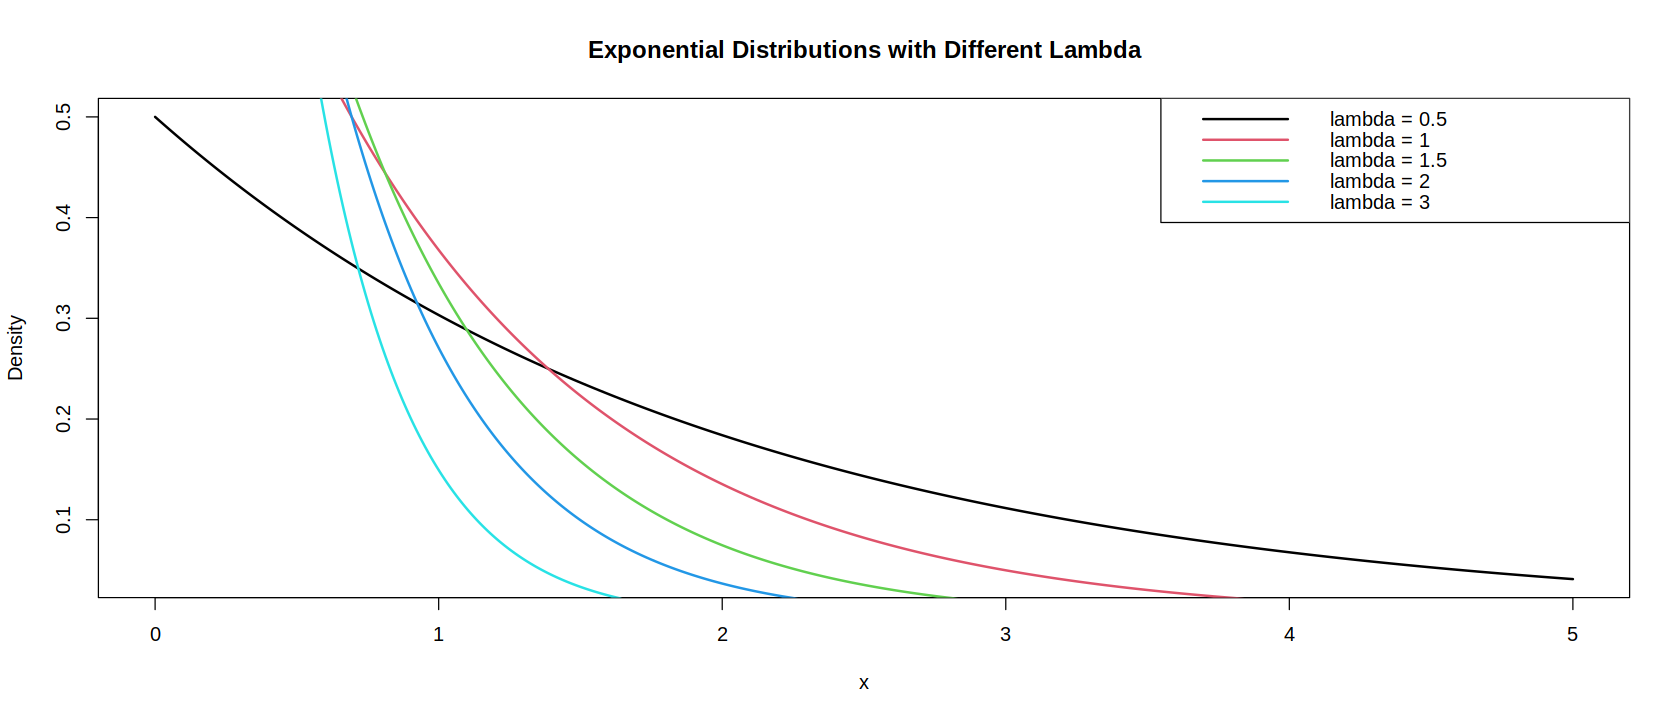

In [41]:
# Define lambda values
lambdas <- c(0.5, 1, 1.5, 2, 3)

# Define a sequence of x values
x_vals <- seq(0, 5, length.out = 500)

# Set up the plot
plot(x_vals, dexp(x_vals, rate = lambdas[1]), type = "l", col = 1,
     ylab = "Density", xlab = "x", lwd = 2,
     main = "Exponential Distributions with Different Lambda")

# Add lines for the other lambda values
for (i in 2:length(lambdas)) {
  lines(x_vals, dexp(x_vals, rate = lambdas[i]), col = i, lwd = 2)
}

# Add a legend
legend("topright", legend = paste("lambda =", lambdas),
       col = 1:length(lambdas), lwd = 2)



---

## ANALOGY BETWEEN EXPONENTIAL AND GEOMETRIC
1. Geometric distribution $Geo()$ models the number of trials until the first success in a series of independent Bernoulli trials. Also the number of trials between two **consecutive** events follows $Geo()$.
2. Exponential distribution $Exp()$ models the time until the first event in a Poisson process (a continuous-time process with independent events occurring at a constant rate). And also the time between two **consecutive** events follows $Exp()$.
3. Both distributions are the only memory-less distributions (respectively for discrete and continuous case), meaning the probability of success or event occurrence in the future is independent of the past.

---

## SUMMARY OF DISCRETE PMF

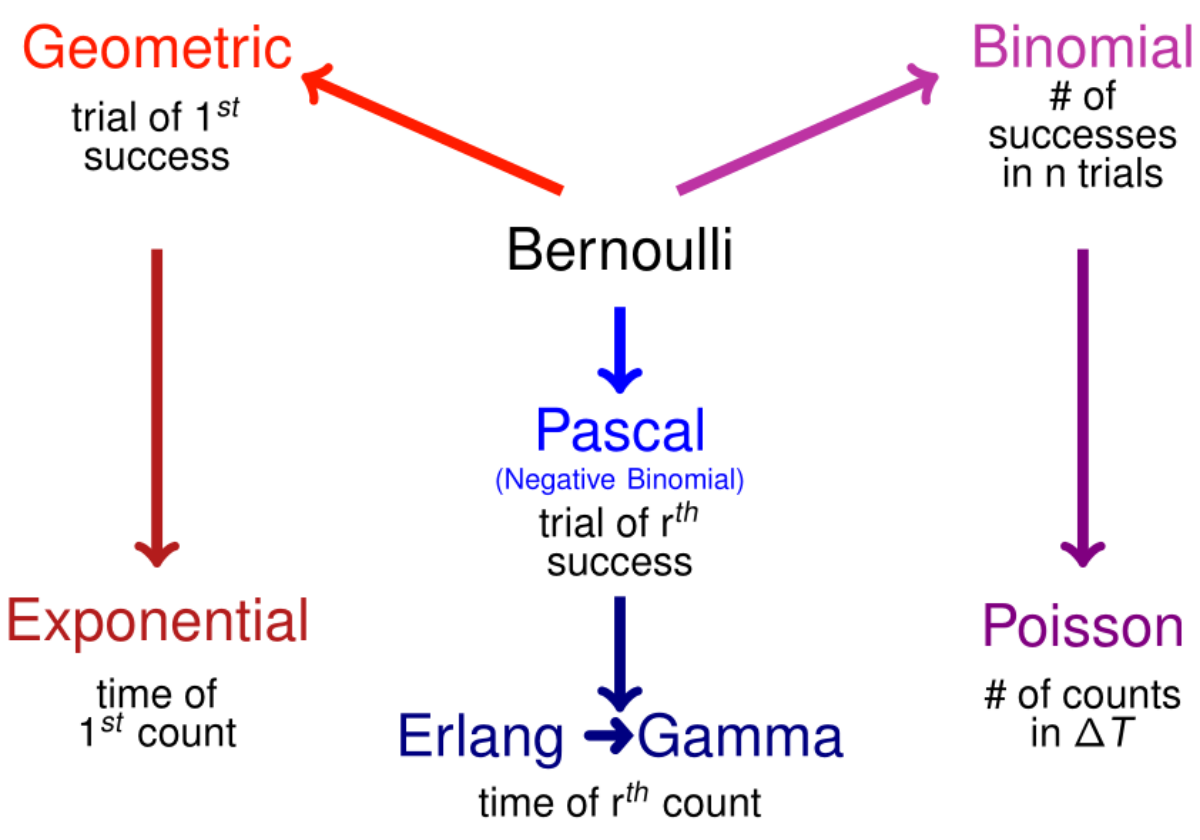

In [44]:
options(repr.plot.width = 10, repr.plot.height = 7)
img <- readPNG("./images/pmf_summary.png"); grid.raster(img)

---

# 03 - CONTINUOUS DISTRIBUTIONS
Some discrete distributions can be easily transfered also to the continuous cas, like exponential, poisson..

---

## UNIFORM DISTRIBUTION
A random variable $X \sim U(a, b)$ follows a uniform distribution if his every value is equally probable. Its probability density function (PDF) is given by:

$$
f(X) = 
\begin{cases}
\frac{1}{b - a} & \text{for } a \leq x \leq b \\
0 & \text{otherwise}
\end{cases}
$$

The CDF is:

$$
F(X) = 
\begin{cases}
0 & \text{for } x < a \\
\frac{x - a}{b - a} & \text{for } a \leq x \leq b \\
1 & \text{for } x > b
\end{cases}
$$

Properties:

$$
E[X] = \frac{a + b}{2},
\quad
\text{Var}(X) = \frac{(b - a)^2}{12}
$$


---

## GAMMA DISTRIBUTION
While the exponential distribution models the time to wait for the first Poisson event to occur (or between two consecutive events), the Gamma Distribution models the **time to wait for the $\alpha$-th event** to occur (or between two non-consecutive events).

A random variable $x$ follows a Gamma distribution, $x \sim \text{Gamma}(\alpha, \lambda)$, if its probability density function (pdf) has the form:

$$ Gamma(x|\alpha, \lambda) = \frac{1}{\Gamma(\alpha)} \lambda^\alpha x^{\alpha - 1} e^{-\lambda x}, \quad x \geq 0 $$

Where $\alpha > 0$ and $\lambda > 0$ are the shape and scale parameters, respectively. $\alpha$ is the number of events you are waiting for, instead $\lambda$ controls how quickly events happen: Higher λ → faster events → the distribution shifts left; Lower λ → slower events → the distribution shifts right. The mean waiting time for one event is $1/\lambda$, just like in the exponential.  
The Gamma function, $\Gamma : (0, \infty) \to \mathbb{R}$, is defined as:

$$ \Gamma(\alpha) = \int_0^{\infty} x^{\alpha-1} e^{-x} \, dx $$

$$ \text{property:} \quad n! = n \cdot (n-1)! \quad \Rightarrow \quad \Gamma(\alpha) = (\alpha - 1) \cdot \Gamma(\alpha - 1), \quad \text{for} \quad \alpha > 1 $$

Mean and variance:
$$
E[X] = \frac{\alpha}{\lambda},
\quad
\text{Var}(X) = \frac{\alpha}{\lambda^2}
$$

Some properties of the gamma distrib:
- If $X \sim \text{Gamma}(\alpha, 1)$, then $\frac{X}{\lambda} \sim \text{Gamma}(\alpha, \lambda)$
- It includes the Exponential distribution as a special case (when $\alpha = 1$)
- The Gamma distribution can be very skewed or almost bell-shaped depending on the values of $\alpha$ and $\lambda$
- It is the distribution of the sum of a number of independent exponential random variables
- The CDF of the Gamma distribution does not have an explicit form. Therefore, the **inverse transform method** cannot be used for generating variates from a Gamma distribution.
- In Bayesian analysis, the Gamma distribution is a natural conjugate prior for the standard deviation of a normal distribution.

Shape behaviour:
- If $\lambda$ is fixed: The peak of the distribution moves to the right as $\alpha$ increases.
- If $\alpha$ is fixed: The peak of the distribution shifts to the left as $\lambda$ increases.


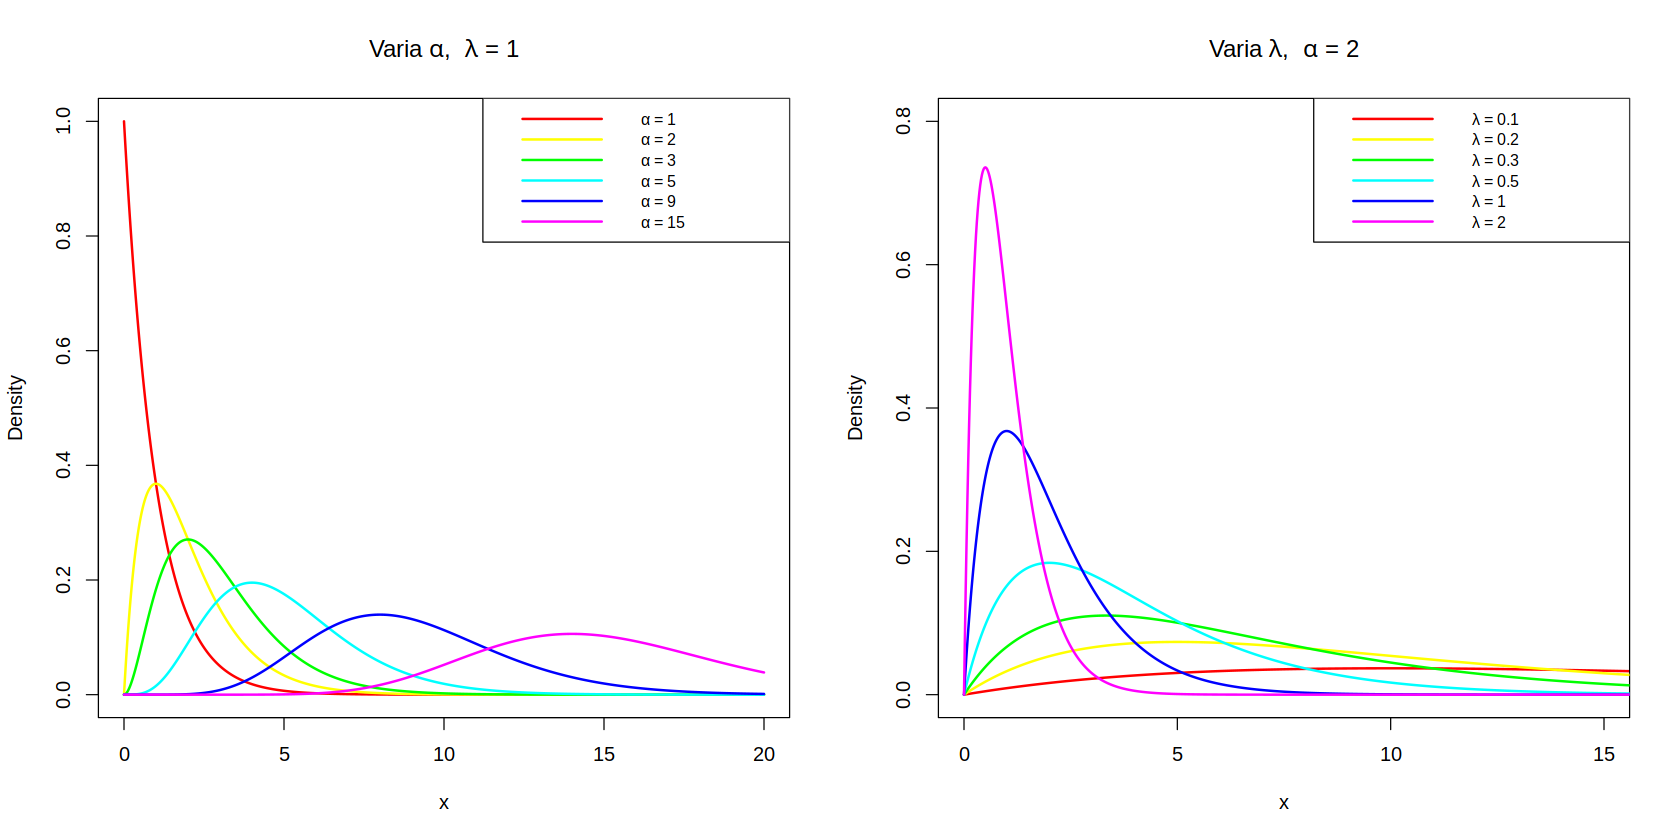

In [12]:
options(repr.plot.width = 14, repr.plot.height = 7)

# Preparazione
x <- seq(0, 20, length.out = 1000)
colors <- rainbow(6)

# Imposta layout: 1 riga, 2 colonne
par(mfrow = c(1, 2))

# Primo grafico: cambia α (shape), fissa λ (rate)
lambda_fixed <- 1
alpha_values <- c(1, 2, 3, 5, 9, 15)

plot(x, dgamma(x, shape = alpha_values[1], rate = lambda_fixed),
     type = "l", col = colors[1], lwd = 2,
     ylim = c(0, 1), xlab = "x", ylab = "Density",
     main = expression(paste("Varia ", alpha, ",  ", lambda, " = 1")))

for (i in 2:length(alpha_values)) {
  lines(x, dgamma(x, shape = alpha_values[i], rate = lambda_fixed),
        col = colors[i], lwd = 2)
}

legend("topright", legend = paste("α =", alpha_values),
       col = colors, lwd = 2, cex = 0.8)

# Secondo grafico: cambia λ (rate), fissa α (shape)
alpha_fixed <- 2
lambda_values <- c(0.1, 0.2, 0.3, 0.5, 1, 2)

plot(x, dgamma(x, shape = alpha_fixed, rate = lambda_values[1]),
     type = "l", col = colors[1], lwd = 2,
     xlim = c(0,15),
     ylim = c(0, 0.8), xlab = "x", ylab = "Density",
     main = expression(paste("Varia ", lambda, ",  ", alpha, " = 2")))

for (i in 2:length(lambda_values)) {
  lines(x, dgamma(x, shape = alpha_fixed, rate = lambda_values[i]),
        col = colors[i], lwd = 2)
}

legend("topright", legend = paste("λ =", lambda_values),
       col = colors, lwd = 2, cex = 0.8)


## BETA DISTRIBUTION
A random variable $X$ follows a Beta distribution, written as $X \sim \text{Beta}(\alpha, \beta)$, if the PDF is:

$$
Beta(x) = \frac{\Gamma(\alpha + \beta)}{\Gamma(\alpha) \cdot \Gamma(\beta)} \, x^{\alpha - 1} (1 - x)^{\beta - 1}, \quad \text{for } 0 \le x \le 1, \; \alpha, \beta > 0
$$

Where
1. $\alpha$ – controls how much the distribution leans toward 1. Think of it as "prior successes" (in a Bayesian context).
2. $\beta$ – controls how much the distribution leans toward 0. Think of it as "prior failures".

Beta distribution **appears in the study of the median of a sample of random points** $X_j \sim \mathcal{U}(0, 1)$.  
Let $X_1 < X_2 < \dots < X_n$ be $n$ sorted values sampled from $\text{Beta}(\alpha, \beta)$.

  - If $n = 2k + 1$ (odd), then the median is $X_{k+1}$
  - If $n = 2k$ (even), then the median is $\frac{X_k + X_{k+1}}{2}$

The median of $2n + 1$ random numbers from $\mathcal{U}(0,1)$ is distributed as $ \text{Beta}(n+1, n+1) $.

Moments:  
$$
\mathbb{E}[X] = \frac{\alpha}{\alpha + \beta}
\quad \quad \quad \quad
\text{Var}(X) = \frac{\alpha \beta}{(\alpha + \beta)^2 (\alpha + \beta + 1)}
$$
$$
\text{n-th moment:}
\quad
\mathbb{E}[X^n] = \frac{\Gamma(\alpha + n)\Gamma(\alpha + \beta)}{\Gamma(\alpha + \beta + n)\Gamma(\alpha)}
$$
$$
\text{Mode: } = \frac{\alpha -1 }{\alpha + \beta - 2} \quad \text{if $\alpha$, $\beta$ > 1}
$$


Shape:
- Increasing: $\alpha > 1$, $\beta < 1$
- Decreasing: $\alpha < 1$, $\beta > 1$
- Symmetric unimodal: $\alpha = \beta$
- Asymmetric unimodal: $\alpha \ne \beta$
- U-shaped: $\alpha < 1$, $\beta < 1$
- Bell shaped: $\alpha > 1$, $\beta > 1$
- The Beta distribution cannot be bimodal (i.e., cannot have two local maxima on $[0, 1]$). In some cases we have to model a random variable that exhibit two modes, for some physical reason. This can be done by mixing two beta distributions.
- The ratio $\alpha/\beta$ controls skewness
- The sum $\alpha+\beta$ controls concentration: Larger values → more concentrated near the mean; Smaller values → more spread out or even U-shaped.

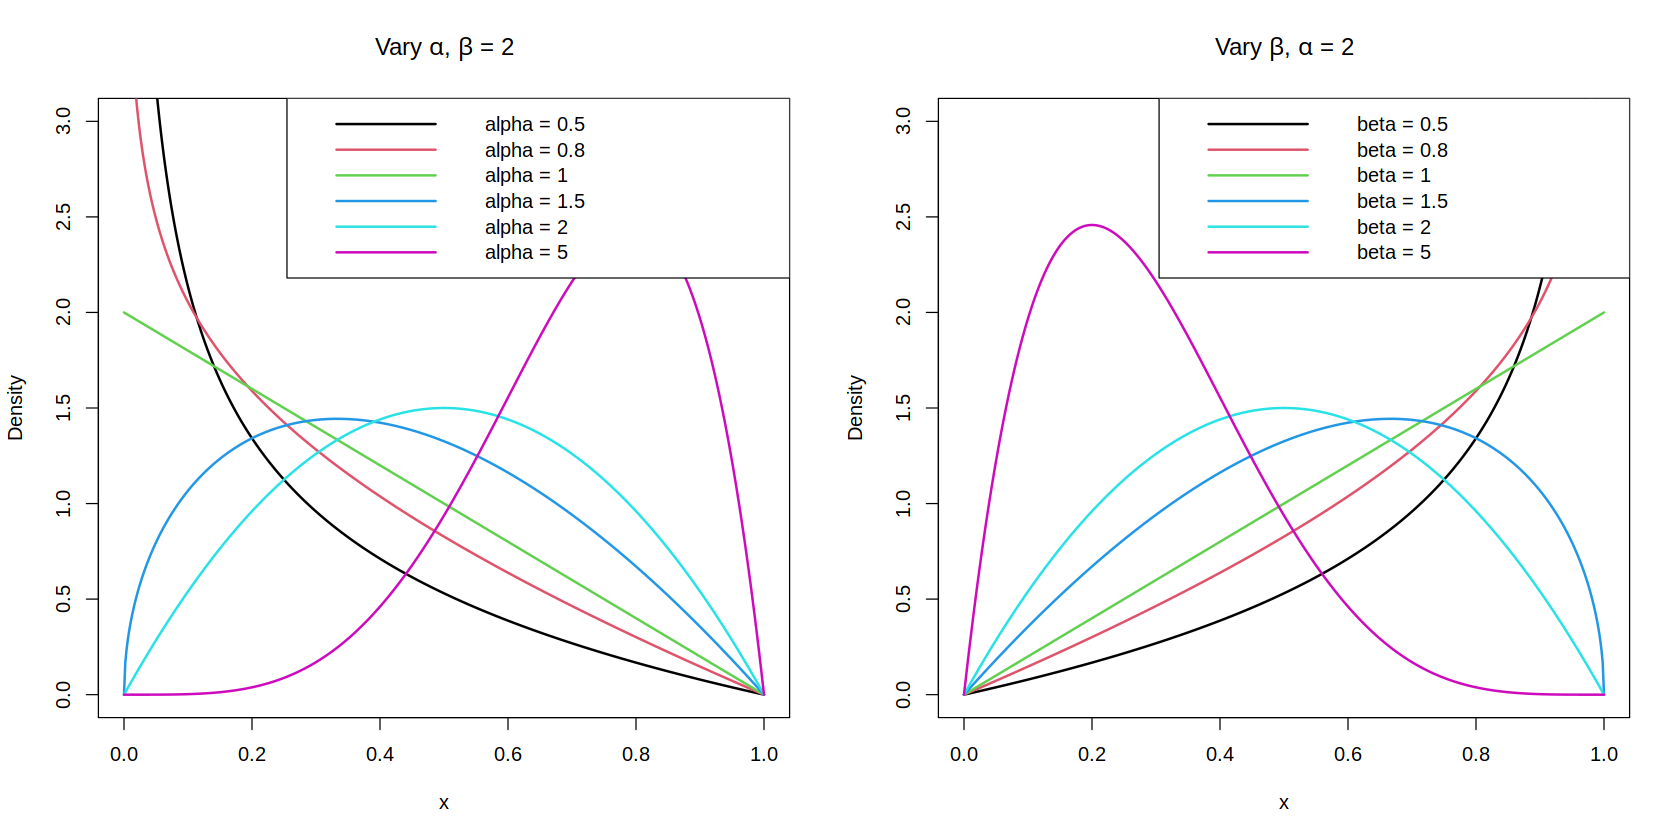

In [20]:
options(repr.plot.width = 14, repr.plot.height = 7)

# Define x values
x <- seq(0, 1, length.out = 500)

# Set up side-by-side plots
par(mfrow = c(1, 2))

# First plot: vary alpha, fix beta = 2
alphas <- c(0.5, 0.8, 1, 1.5,  2, 5)
beta_fixed <- 2

plot(x, dbeta(x, alphas[1], beta_fixed), type = "l", lwd = 2,
     ylim = c(0, 3), col = 1, main = expression(paste("Vary ", alpha, ", ", beta, " = 2")),
     xlab = "x", ylab = "Density")

for (i in 2:length(alphas)) {
  lines(x, dbeta(x, alphas[i], beta_fixed), col = i, lwd = 2)
}
legend("topright", legend = paste0("alpha = ", alphas), col = 1:length(alphas), lwd = 2)

# Second plot: vary beta, fix alpha = 2
betas <- c(0.5, 0.8, 1, 1.5,  2, 5)
alpha_fixed <- 2

plot(x, dbeta(x, alpha_fixed, betas[1]), type = "l", lwd = 2,
     ylim = c(0, 3), col = 1, main = expression(paste("Vary ", beta, ", ", alpha, " = 2")),
     xlab = "x", ylab = "Density")

for (i in 2:length(betas)) {
  lines(x, dbeta(x, alpha_fixed, betas[i]), col = i, lwd = 2)
}
legend("topright", legend = paste0("beta = ", betas), col = 1:length(betas), lwd = 2)


---

## NORMAL (GAUSSIAN) DISTRIBUTION
A random variable $X$ follows a normal distribution, $X \sim N(\mu, \sigma^2)$, if the pdf is:

$$
Norm(x) = \frac{1}{\sigma \sqrt{2\pi}} e^{-\frac{(x - \mu)^2}{2\sigma^2}}
$$

where $\mu$ can be any real number and $\sigma > 0$. If $\mu = 0$ and $\sigma = 1$, it is called a standard normal distribution: $X \sim N(0, 1)$.

Mean and variance:
$$E[X] = \mu \quad \quad \text{Var}(X) = \sigma^2$$

The standard normal distribution is symmetric and unimodal about the mean, $\mu$.  
Keeping $\sigma^2$ fixed, and changing $\mu$, the normal distribution only gets shifted to a new center.  
Maintaining $\mu$ fixed and increasing $\sigma^2$, the distribution becomes more spread out about the same mean value.

#### SUM OF NORMAL DISTRIBUTED VARIABLES
Let $X_1, X_2, \dots, X_n$ be independent random variables where $X_j \sim N(\mu_j, \sigma_j^2)$.  
We define $Y_n$ as the sum: $ Y_n = \sum_{j=1}^{n} X_j $. It can be proved that the $Y_n$ follows a gaussian distribution as:

$$ Y_n \sim \text{Norm} \left( \sum_{j=1}^{n} \mu_j, \sum_{j=1}^{n} \sigma_j^2 \right) $$

#### AVERAGE OF NORMAL DISTRIBUTED VARIABLES
Given $n$ random variables, all following the same $N(\mu, \sigma^2)$ distribution, we have:

$$ \frac{1}{n} \sum_{j=1}^{n} X_j \sim \text{Norm} \left( \mu, \frac{\sigma^2}{n} \right) $$

This means that the distribution of $X$ gets more concentrated around the mean value $\mu$ as $n$ increases, because the variance $\sigma^2$ decreases with $n$.


Any linear combination of independent normal variables is also normal.

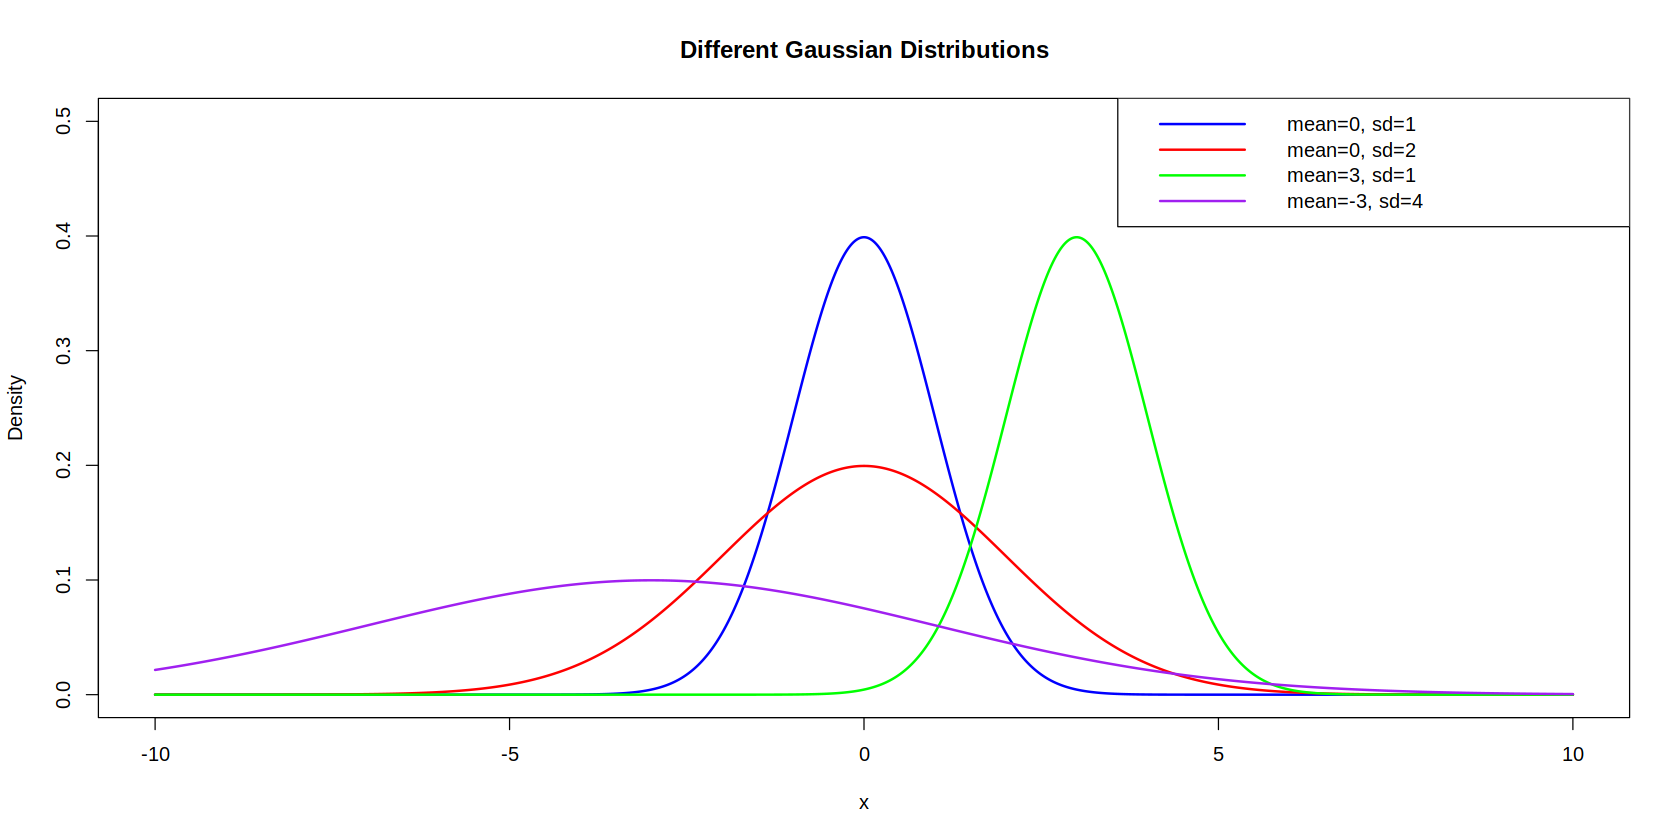

In [24]:
options(repr.plot.width = 14, repr.plot.height = 7)

# Define a function to plot normal distributions with different parameters
plot_gaussians <- function() {
  # Create a sequence of x values
  x <- seq(-10, 10, length.out = 1000)
  
  # Plot the first Gaussian (mean = 0, sd = 1)
  plot(x, dnorm(x, mean = 0, sd = 1), type = "l", col = "blue", lwd = 2,
       main = "Different Gaussian Distributions", xlab = "x", ylab = "Density", 
       xlim = c(-10, 10), ylim = c(0, 0.5))
  
  # Add other Gaussian curves with different means and standard deviations
  lines(x, dnorm(x, mean = 0, sd = 2), col = "red", lwd = 2)
  lines(x, dnorm(x, mean = 3, sd = 1), col = "green", lwd = 2)
  lines(x, dnorm(x, mean = -3, sd = 4), col = "purple", lwd = 2)
  
  # Add a legend
  legend("topright", legend = c("mean=0, sd=1", "mean=0, sd=2", "mean=3, sd=1", "mean=-3, sd=4"), 
         col = c("blue", "red", "green", "purple"), lty = 1, lwd = 2)
}

# Call the function to plot the Gaussians
plot_gaussians()


## LIMIT THEOREMS
Let $X_1, X_2, \dots, X_n$ be independent random variables drawn from the same distribution, each with mean $\mu$ and variance $\sigma^2$.  
We define $S_n = \sum_{j=1}^{n} X_j$.  
Since $X_j$ are independent and identically distributed:
  - $E[S_n] = nE[X_j] = n\mu$
  - $\text{Var}(S_n) = n\text{Var}(X_j) = n\sigma^2$
  
The following theorems apply:

#### STRONG LAW OF LARGE NUMBERS
$$
\lim_{n \to \infty} \frac{S_n}{n} = \mu \quad \text{(with probability 1)}
$$
This theorem tells us that as we increase the number of samples, the average of the $X_j$'s converges to the true mean $\mu$ almost surely.

#### CENTRAL LIMIT THEOREM (CLT)
$$
\lim_{n \to \infty} P \left( \frac{S_n - n\mu}{\sqrt{n}\sigma} \leq x \right) = \Phi(x)
$$
Here, $\Phi(x)$ is the CDF of the standard normal distribution.

The Central Limit Theorem says that, as $n$ increases, the distribution of the normalized sum (i.e., the sum of $X_j$'s shifted by $n\mu$ and scaled by $\sqrt{n}\sigma$) converges to the standard normal distribution. 

---

# 04 - INEQUALITIES
We will discuss three important inequalities. These inequalities are especially useful in **situations where we don't know the full distribution** of a random variable — that is, we don't know the exact shape or form of its probability distribution.

However, if we do know some basic information, such as the expected value (mean) and/or the variance, we can still make meaningful statements about the probabilities of certain events.

These inequalities help us **derive bounds** (upper or lower limits) on probabilities using only that limited information.

## MARKOV'S INEQUALITY
Let $X$ be a non-negative random variable with a finite expected value $\mathbb{E}[X]$.  
Then, for any $a > 0$, the following inequality holds:

$$
\mathbb{P}(X \geq a) \leq \frac{\mathbb{E}[X]}{a}
$$


Markov’s inequality gives an upper bound on the probability that a non-negative random variable exceeds a certain value.  
It is useful when we do not know the full distribution, but do know the expected value.

EXAMPLE:  
Let $\mathbb{E}[X] = 10$. What can we say about the probability that $X \geq 50$?

$$
\mathbb{P}(X \geq 50) \leq \frac{10}{50} = 0.2
$$

So, even without knowing the distribution of $X$, we can say that the chance of $X$ exceeding 50 is at most 20%.


---

## JENSEN'S INEQUALITY
Let $X$ be a random variable with finite mean, and let $\varphi$ be a convex function (i.e. positive second derivative).  
Then Jensen’s inequality states:

$$
\varphi\left( \mathbb{E}[X] \right) \leq \mathbb{E}\left[ \varphi(X) \right]
$$

If $\varphi$ is concave, the inequality is reversed:

$$
\varphi\left( \mathbb{E}[X] \right) \geq \mathbb{E}\left[ \varphi(X) \right]
$$


Jensen’s inequality connects the **expectation of a function** of a random variable to the **function of the expectation**.  
It’s particularly useful in probability, statistics, and information theory.

- For convex functions (e.g., $\varphi(x) = x^2$, $\varphi(x) = e^x$), the "function of the mean" is less than or equal to the "mean of the function".
- For concave functions (e.g., $\log x$, $\sqrt{x}$), the "function of the mean" is greater than or equal to the "mean of the function".

We could say that **a convex function amplifies deviations from the mean**. This means that when you apply a convex function to values away from the mean, it increases their influence more than if you just applied the function to the mean itself.

EXAMPLE:  
Let $X$ be a random variable such that $\mathbb{E}[X] = 2$, and let $\varphi(x) = x^2$, which is convex.

Then: $  \varphi\left( \mathbb{E}[X] \right) =\left( \mathbb{E}[X] \right)^2 = 2^2 = 4 $ and by Jensen’s inequality:

$$
4 = \varphi\left( \mathbb{E}[X] \right) \leq \mathbb{E}[X^2]
$$

This tells us: $\mathbb{E}[X^2] \geq 4$


---

## CHEBYSHEV'S INEQUALITY
Let $X$ be a random variable with finite expected value $\mathbb{E}[X] = \mu$ and finite variance $\mathrm{Var}(X) = \sigma^2$.

Then, for any $k > 0$:

$$
\mathbb{P}(|X - \mu| \geq k\sigma) \leq \frac{1}{k^2}
$$

Sometimes it's written in terms of general $\varepsilon > 0$:

$$
\mathbb{P}(|X - \mu| \geq \varepsilon) \leq \frac{\sigma^2}{\varepsilon^2}
$$

Chebyshev’s inequality gives an **upper bound** on the probability that a random variable deviates from its mean by more than $k$ standard deviations ($\sigma$).  
It works regardless of the distribution of $X$ — no assumptions of normality or symmetry are needed. In other words it gives insight into how "concentrated" the distribution is around the mean.


EXAMPLES:  
Let $\mu = \mathbb{E}[X]$ and $\sigma^2 = \mathrm{Var}(X)$.  
Then::

$$ \mathbb{P}(|X - \mu| \geq 2\sigma) \leq \frac{1}{4} = 0.25 \quad \text{for} \quad k=2 $$
$$ \mathbb{P}(|X - \mu| \geq 4\sigma) \leq \frac{1}{16} = 0.06 \quad \text{for} \quad k=4 $$
$$ \mathbb{P}(|X - \mu| \geq 10\sigma) \leq \frac{1}{100} = 0.01 \quad \text{for} \quad k=10 $$

This means for example that no more than 25% of the values lie more than 2 standard deviations away from the mean — for any distribution.

---

# 05 - BAYESIAN INFERENCE

## BAYES THEOREM, PRIOR AND POSTERIOR
Bayes’ theorem gives a mathematical rule for inverting conditional probabilities, allowing one to find the probability of a cause given its effect. Its general equation states:

$$ P(A|B)= \frac{P(B|A) \cdot P(A) }{ P(B) } $$

But a more detailed version is:

$$ P(H_j \mid E_k) = \frac{P(E_k \mid H_j) \cdot P(H_j)}{ \sum_j P(E_k\mid H_j) \cdot P(H_j) } $$



Where:

- $H_j$ is the $j$-th hypothesis.
- $E_k$ is the observed evidence (or data).

We can then identify the terms as:
- $P(H_j)$ is the **prior probability**: our belief in the hypothesis *before* seeing the data.
- $P(H_j \mid E_k)$ is the **posterior probability**: our updated belief in the hypothesis *after* observing the data.
- $P(E_k\mid H_j)$ is the **likelihood**: the probability of observing the data $E_k$ assuming $H_j$ is true. It is orften assumed as a gaussian pdf
- $P(E_k) $ serves as a **normalizing constant** to make sure the posterior is a proper probability distribution. It is called **evidence** or marginal likelihood: the total probability of the evidence under all possible hypotheses.

Bayes' theorem allows us to perform rational inference: instead of relying only on intuition, we formally update our beliefs using probability theory and observed evidence. This is the core idea behind Bayesian statistics, Bayesian machine learning, and Bayesian inference in general.  
In this way the Bayes theorem can be rewrite as **'We update the Prior using the Likelihood to obtain the Posterior'**:
$$ \text{Posterior} \propto \text{Likelihood} \cdot \text{Prior} $$

Sometimes the denominator is hard to compute, or we are only interested in how the posterior changes across different hypotheses. In any case it is useful only as a normalization factor. It can be found with (where $\theta$ are parameters of the model):
$$
P(E_k) = \int P(E_k \mid \theta) \cdot P(\theta) \, \text{d}\theta 
\quad \quad \text{or} \quad \quad
P(E_k) = \sum_j P(E_k\mid H_j) \cdot P(H_j)
$$


## BAYESIAN MODEL COMPARISON
Given a set of models $\{H_j\}$, we want to find out which one is best supported by data. This means finding $P(H_j|D)$, the model **posterior** probability.

#### CASE: ONE MODEL WITHOUT PARAMETERS
We start by looking at model comparison for the simple case of models with no parameters. We look for the posterior $P(H|D)$, i.e. the posterior probability of the whole model $H$ given the data $D$.


With some math, we can write:
$$ P(H \mid D) = \frac{1}{1 + \frac{1}{R}} $$

where $R$ is the **posterior odd ratio**, that tells us how our belief in $H$ changes after seeing the data:
$$ R = \frac{P(H \mid D)}{P(\bar{H} \mid D)} = \frac{P(D \mid H) P(H)}{P(D \mid \bar{H}) P(\bar{H})} $$

Here $P(D \mid H)$ is the probability of measuring $D$ when $H$ is true, $P(D \mid \bar{H})$ the probability of measuring $D$ when $H$ is false, $P(H)$ the prior probability that $H$ is true (and of course, $P(\bar{H}) = 1 - P(H)$).

If we have no reason to prefer $H$ over $\bar{H}$, we can set: $ P(H) = P(\bar{H}) $. In this case $R$ becomes the **Bayes factor**, i.e. the ratio of the probability of the data under each model, taht tells us how strongly the data favors one model over another:
$$ \text{BF} = \frac{P(D \mid H)}{P(D \mid \bar{H})} $$

#### CASE: MULTIPLE MODELS WITHOUT PARAMETERS
Suppose we have more models, $\{ H_j \}$, with $\sum_j P(H_j) = 1$. Then the probability of the data becomes:
$$ P(D) = \sum_j P(D \mid H_j) P(H_j) $$

The posterior probability of model #1, $H_1$, becomes:
$$ P(H_1 \mid D) = \frac{P(D \mid H_1) P(H_1)}{P(D)} $$

If we do not have a complete set of models, we cannot compute full posterior probabilities, but we can still compute the odds ratio or Bayes factor between any two models:

$$ \text{BF} = \frac{P(D \mid H_1)}{P(D \mid H_2)}
\quad \text{and} \quad
R = \frac{P(D \mid H_1) P(H_1)}{P(D \mid H_2) P(H_2)}
$$

EXAMPLE:   
We define the following propositions: $D$: a person tests positive; $H$: a person has the disease.   
A test for a disease is 90% reliable, i.e. $P(D \mid H) = 0.9$.    
The probability of testing positive in absence of the disease is 0.07, i.e. $P(D \mid \bar{H}) = 0.07$.  
Among people aged 40 to 50 with no symptoms, 8 in 1000 have the disease, so $P(H) = 0.008$.  
    
    Question: If a person in their 40s tests positive, what is the probability that they have the disease?
    
    Answer: we compute the posterior odds ratio $R$:

$$
R = \frac{P(D \mid H) \cdot P(H)}{P(D \mid \bar{H}) \cdot P(\bar{H})}
= \frac{0.9 \cdot 0.008}{0.07 \cdot (1 - 0.008)}
= \frac{7.2 \cdot 10^{-3}}{6.944 \cdot 10^{-2}} \approx 0.1037
$$

    Then the posterior probability is:

$$
P(H \mid D) = \frac{R}{1 + R} = \frac{1}{1 + \frac{1}{R}} \approx 0.094
$$

    Interpretation: Even though a positive test result is quite likely **if** the person has the disease, the probability that the person actually has the disease, given a positive test, is still low. This is because the false positive rate and the low base rate (prevalence) of the disease heavily influence the result.


## PARAMETERS BEST ESTIMATES AND RELIABILITY
Once the posterior is determined, we wish to summarize our inference on a parameter with two numbers: the **best estimat and a measure of its reliability**. The posterior is a probability distribution associated with the parameter, which expresses how much we believe the true value lies near a particular point.

The **best estimate** corresponds to the maximum of the posterior probability density function:
$$\theta_{best} = \arg\max P(\theta \mid D)$$

To assess the reliability of our best estimate, we look at the spread of the posterior around $\theta_{best}$. For this, we consider a Taylor expansion of the posterior pdf around $\theta_{best}$, but instead of the pdf itself, we work with its natural logarithm (which is a monotone function):

$$L(\theta) = \ln P(\theta \mid D) 
\quad \quad  \quad \text{and expanding:} \quad \quad \quad 
L(\theta) = L(\theta_{best}) + \frac{1}{2} \left. \left( \frac{d^2L}{d\theta^2}\right|\right)_{\theta_{best}} (\theta - \theta_{best})^2 + \dots
$$

If we ignore higher-order terms and exponentiate the expansion, we get: $P(\theta \mid D) \approx A \exp\left( -\frac{1}{2} \left.\frac{d^2L}{d\theta^2}\right|_{\theta_{best}} (\theta - \theta_{best})^2 \right)$ where $A$ is a normalization constant. This is the form of a Gaussian distribution! Comparing the exponents, we get: $\left.  \frac{d^2L}{d\theta^2}\right|_{\theta^\circ} = -\frac{1}{\sigma^2}$ which gives us the **reliability**:

$$\sigma = \left( -\left.\frac{d^2L}{d\theta^2}\right|_{\theta_{best}} \right)^{-1/2}$$

In the end, our inference about the parameter is then:
$$ \theta = \theta_{best} \pm \sigma $$

#### ASYMMETRIC POSTERIOR PDF
There are times when the posterior probability density function (pdf) is markedly asymmetric. In such cases, while the maximum of the posterior can still be regarded as giving the best estimate, the concept of symmetric error bars does not seem appropriate, and we have to drop our previous gaussian approximation.

A good way to express the reliability of our estimate in these cases is through a confidence interval. Specifically, we define an interval $[x_1, x_2)$ such that:

$$ P(x_1 \leq x < x_2 \mid D, H) = \int_{x_1}^{x_2} P(x \mid D, H)\,dx \approx 0.95 $$

This means we are approximately 95% confident that the true value of the parameter lies within the interval $[x_1, x_2)$. 


---

# 06 - CONJUGATE PRIORS
In statistics, a **conjugate prior** is a prior distribution that, when combined with a given likelihood function through Bayes’ theorem, results in a posterior distribution that belongs to the same family as the prior.

Some examples, whose names are ordered like conjugate prior + likelihood, are: 
* *Beta-Binomial model* for the case of a Beta prior with a Binomial likelihood.
* *Gamma-Poisson model* (or "Poisson-Gamma model") for a Gamma prior with a Poisson likelihood.
* *Normal-Normal model* when both the prior and the likelihood are Normal distributions.
* *Dirichlet-Multinomial model* for a Dirichlet prior with a Multinomial likelihood.

## BETA-BINOMIAL MODEL
The Beta-Binomial model is a classic example in Bayesian statistics used to model binary data. Suppose we are observing a process that results in a sequence of binary outcomes (so Bernoulli trials), such as flipping a coin or checking whether a customer purchases a product.  

If we perform $n$ independent trials and observe $r$ successes, we can model this with a **Binomial likelihood**:

$$
P(r \mid p) \sim \text{Binomial}(n, p)
$$

where $r$ is the number of observed successes and $p$ is the unknown probability of success. In the Bayesian framework, we treat $p$ as a random variable and assign it a prior distribution. A natural choice for **the prior is the Beta distribution**, because it is defined on the interval $[0, 1]$ (like a probability) and is conjugate to the Binomial likelihood. Note that the uniform prior is included because $Unif \sim Beta(1,1)$. So the prior is given by:

$$
P(p) \sim \text{Beta}(\alpha, \beta)
$$

Here, **$\alpha$ and $\beta$ are hyperparameters that represent our prior beliefs about the number of "successes" and "failures" before seeing any data**. The conjugacy between the Beta prior and the Binomial likelihood means that the posterior distribution for $p$ is also a Beta distribution. After observing $x$ successes in $n$ trials, the posterior distribution is given by:

$$
P( p \mid r ) \sim \text{Beta}(\alpha + r, \beta + n - r)
$$

SUMMARY:  
I have a prior probability $ \text{Beta}(\alpha, \beta) $ over the success rate $p$, where $ \alpha $ and $ \beta $ are parameters that represent prior counts (or "pseudo-observations") of successes and failures, respectively. Once I observe data with $ r $ successes over $ n $ trials, I can update my belief about the success probability $p$ using Bayes’ theorem. The posterior distribution for $p$ is then:

$$ \text{Beta}( \quad \alpha + \text{successes}, \quad \beta + \text{failures} \quad ) = \text{Beta}(\alpha + r, \beta + n - r) $$

NOTE:  
As we can see in the image below, as the number of trial grows, we are eventually bought to the same conclusions irrespective of our initial beliefs (prior):
* the posterior pdf is then dominated by the likelihood function
* the choice of the prior becomes largely irrelevant

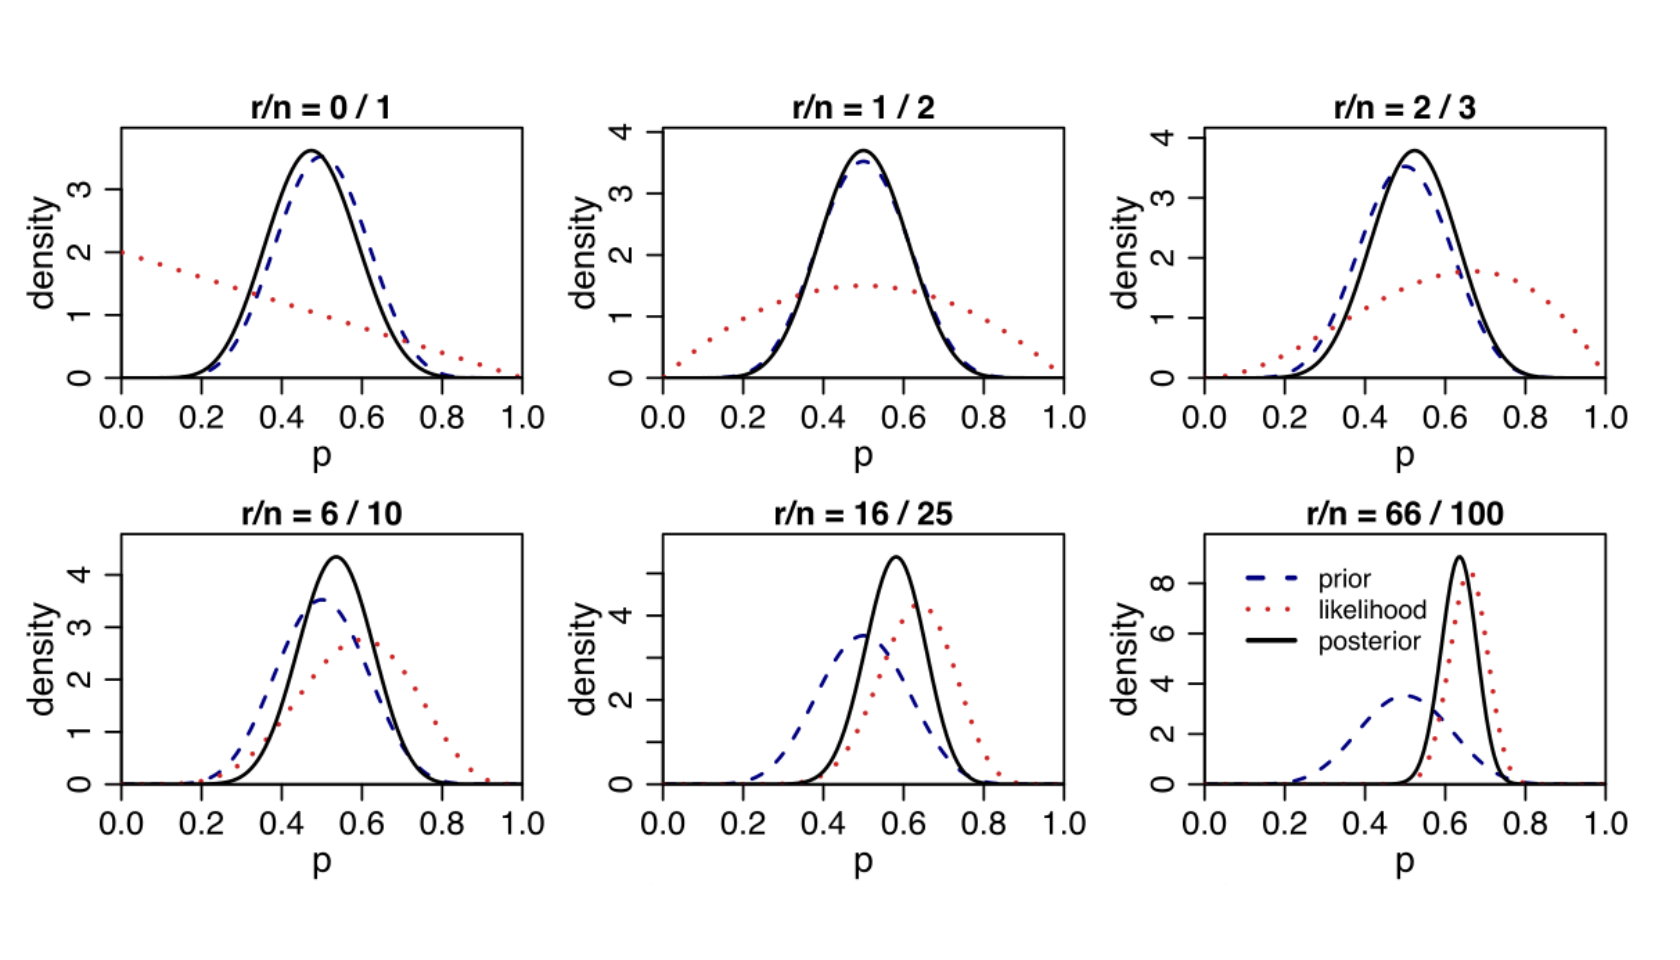

In [5]:
options(repr.plot.width = 14, repr.plot.height = 8)
img <- readPNG("./images/beta_binomial_cases.png"); grid.raster(img)

#### EXAMPLE
In proximity of the elections for student representatives in a University board, Anna, Chris, and Maggie decide to perform a survey among their classmates to evaluate how strong the chances are for their friend, who is a candidate. The aim is to infer the probability that their friend will be elected. Before conducting any interviews, each of them chooses a prior based on their beliefs.

* Anna believes there is a 20% chance their friend will be elected, with a standard deviation of 0.08. She assumes a $Beta(a,b)$ prior such that:
$$ E[x] = \frac{a}{a + b} = 0.2 \quad \quad \text{and} \quad \quad 
1 - E[x] = \frac{b}{a + b} = 0.8
\quad \quad \text{so} \quad \quad
\text{Var}[x] = \frac{ab}{(a + b)^2(a + b + 1)} = 0.08^2 = 0.0064
$$

    solving this yields $a = 4.8$ and $b = 19.2$.

* Chris is a new student and does not have any prior information or intuition about the candidate's popularity, so he assumes a uniform prior, which corresponds to a Beta distribution with $a = b = 1$.
* Maggie believes the probability distribution should be flat, but only within a certain interval. She therefore assumes a trapezoidal prior that is flat between 0.1 and 0.3, and zero elsewhere. This is a user-defined prior and not a standard Beta distribution.

They then proceed with the survey by interviewing $n = 100$ students who regularly visit the University canteen and are not personally known to them. Among these, $x = 26$ students state they will support and vote for their candidate friend.

To compute the posterior distribution, Anna and Chris use the Beta-binomial model, which allows for easy updating due to the conjugacy of the Beta prior with the Binomial likelihood.

* For Anna, the posterior becomes:
$$\text{Beta}(\alpha = 4.8 + 26, \beta = 19.2 + 74) = \text{Beta}(30.8, 93.2)$$

* For Chris, the posterior is:
$$\text{Beta}(\alpha = 1 + 26, \beta = 1 + 74) = \text{Beta}(27, 75)$$

* Maggie, having chosen a non-Beta prior, cannot use the conjugate update rule. She must compute the posterior numerically by multiplying her prior by the likelihood function and normalizing the result.


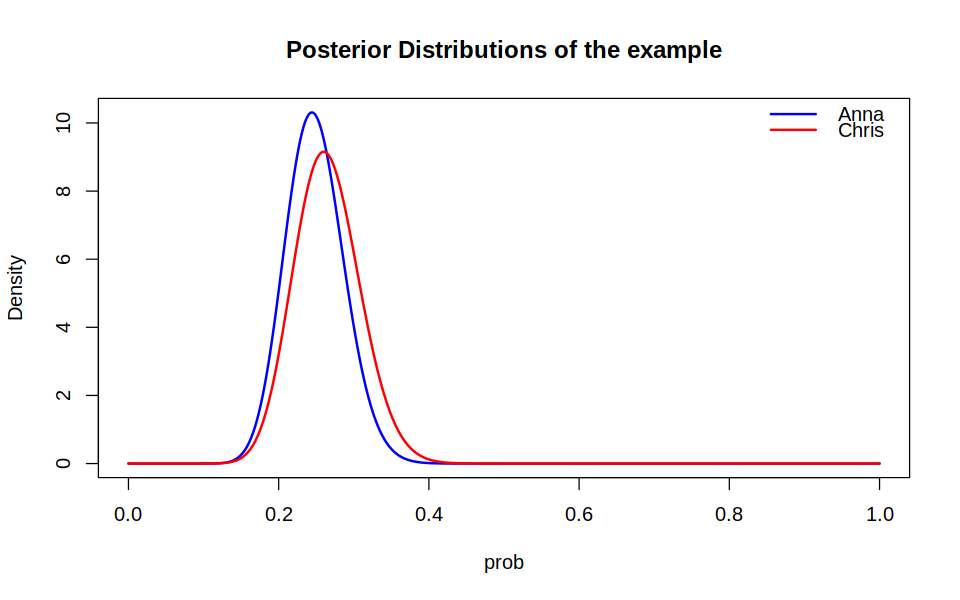

In [26]:
# Define x values
x_val <- seq(0, 1, 0.001)

# Define the two Beta posteriors
y1 <- dbeta(x_val, 30.8, 93.2)  # Anna
y2 <- dbeta(x_val, 27, 75)      # Chris

# Plot the first posterior
options(repr.plot.width = 8, repr.plot.height = 5)
plot(x_val, y1, type = "l", col = "blue", lwd = 2,
     xlab = 'prob', ylab = "Density",
     main = "Posterior Distributions of the example",
     ylim = range(c(y1, y2)))

# Add the second posterior
lines(x_val, y2, col = "red", lwd = 2)

# Add legend
legend("topright", legend = c("Anna", "Chris"), col = c("blue", "red"), lwd = 2, bty = "n")

## GAMMA-POISSON MODEL

## 
